In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib.dates as dt
from io import StringIO, BytesIO 
    # StringIO to separate duplicates... implementation is work in progress
    # BytesIO for unicode data... work in progress
import os
    # importing datalog for non-windows users
import scipy.stats as st

### Array for assigning header ("names") to columns in df (dataframe)

In [2]:
header_data = ["UTCCode", "date", "time", "currentDraw", "T_N1", "T2", "T_N3", "batteryVoltage", "solarCellVoltage", "solarPanelVoltage"]

## Importing datalog.txt

In [3]:
# For Windows Users: if so, pls uncomment section below
df = pd.read_csv(r"C:\Users\xplod\Documents\Coding\Python\Shonto SOlar\Datalog 2023_10_15.txt", delimiter =",", index_col=False, header = None, names=header_data)
df["dateTime"] = pd.to_datetime(df.UTCCode, unit='s')
    
# # For non-Windows Users: if so, pls uncomment section below
# os.chdir(r"../Datalogs/")
# df = pd.read_csv("datalog5load.txt", delimiter=",", index_col=False, header = None, names=header_data)
# df["dateTime"] = pd.to_datetime(df.UTCCode, unit='s')

df

,UTCCode,date,time,currentDraw,T_N1,T2,T_N3,batteryVoltage,solarCellVoltage,solarPanelVoltage,dateTime
0,1652789628,2022-17-05,12:13:48,0.16,0.0,56.75,0.0,26.27,0.0,0.0,2022-05-17 12:13:48
1,1652789653,2022-17-05,12:14:13,0.14,0.0,57.50,0.0,26.24,0.0,0.0,2022-05-17 12:14:13
2,1652789684,2022-17-05,12:14:44,0.16,0.0,57.75,0.0,26.21,0.0,0.0,2022-05-17 12:14:44
3,1652789716,2022-17-05,12:15:16,0.16,0.0,58.00,0.0,26.21,0.0,0.0,2022-05-17 12:15:16
4,1652789747,2022-17-05,12:15:47,0.16,0.0,58.25,0.0,26.21,0.0,0.0,2022-05-17 12:15:47
...,...,...,...,...,...,...,...,...,...,...,...
576450,1670836607,2022-12-12,09:16:47,0.17,0.0,10.25,0.0,25.44,0.0,0.0,2022-12-12 09:16:47
576451,1670836638,2022-12-12,09:17:18,0.17,0.0,10.25,0.0,25.44,0.0,0.0,2022-12-12 09:17:18
576452,1670836670,2022-12-12,09:17:50,0.16,0.0,10.25,0.0,25.47,0.0,0.0,2022-12-12 09:17:50
576453,1670836701,2022-12-12,09:18:21,0.16,0.0,10.25,0.0,25.53,0.0,0.0,2022-12-12 09:18:21


### Converting UTC_column into date:time := stored into UTC (dataframe) & Deletes unused columns in df (dataframe)

In [4]:
# # Separates UTC values for conversion to date:time
# UTC = df[['UTC_code']].copy()

#df['line'] = np.arange(len(df))
4
# Deleting Unused Columns
del df['T_N1']
del df['T_N3']
del df['solarCellVoltage']
del df['solarPanelVoltage']

# To Check output 
df

,UTCCode,date,time,currentDraw,T2,batteryVoltage,dateTime
0,1652789628,2022-17-05,12:13:48,0.16,56.75,26.27,2022-05-17 12:13:48
1,1652789653,2022-17-05,12:14:13,0.14,57.50,26.24,2022-05-17 12:14:13
2,1652789684,2022-17-05,12:14:44,0.16,57.75,26.21,2022-05-17 12:14:44
3,1652789716,2022-17-05,12:15:16,0.16,58.00,26.21,2022-05-17 12:15:16
4,1652789747,2022-17-05,12:15:47,0.16,58.25,26.21,2022-05-17 12:15:47
...,...,...,...,...,...,...,...
576450,1670836607,2022-12-12,09:16:47,0.17,10.25,25.44,2022-12-12 09:16:47
576451,1670836638,2022-12-12,09:17:18,0.17,10.25,25.44,2022-12-12 09:17:18
576452,1670836670,2022-12-12,09:17:50,0.16,10.25,25.47,2022-12-12 09:17:50
576453,1670836701,2022-12-12,09:18:21,0.16,10.25,25.53,2022-12-12 09:18:21


### Calculating Z-scores

In [5]:
df.insert(4, 'currentDrawZ', st.zscore(df['currentDraw']))
df.insert(6, 'T2Z', st.zscore(df['T2']))
df.insert(8, 'batteryVoltageZ', st.zscore(df['batteryVoltage']))
df

,UTCCode,date,time,currentDraw,currentDrawZ,T2,T2Z,batteryVoltage,batteryVoltageZ,dateTime
0,1652789628,2022-17-05,12:13:48,0.16,-1.626681,56.75,1.632600,26.27,0.547636,2022-05-17 12:13:48
1,1652789653,2022-17-05,12:14:13,0.14,-1.988551,57.50,1.681487,26.24,0.513946,2022-05-17 12:14:13
2,1652789684,2022-17-05,12:14:44,0.16,-1.626681,57.75,1.697782,26.21,0.480255,2022-05-17 12:14:44
3,1652789716,2022-17-05,12:15:16,0.16,-1.626681,58.00,1.714078,26.21,0.480255,2022-05-17 12:15:16
4,1652789747,2022-17-05,12:15:47,0.16,-1.626681,58.25,1.730373,26.21,0.480255,2022-05-17 12:15:47
...,...,...,...,...,...,...,...,...,...,...
576450,1670836607,2022-12-12,09:16:47,0.17,-1.445747,10.25,-1.398354,25.44,-0.384461,2022-12-12 09:16:47
576451,1670836638,2022-12-12,09:17:18,0.17,-1.445747,10.25,-1.398354,25.44,-0.384461,2022-12-12 09:17:18
576452,1670836670,2022-12-12,09:17:50,0.16,-1.626681,10.25,-1.398354,25.47,-0.350771,2022-12-12 09:17:50
576453,1670836701,2022-12-12,09:18:21,0.16,-1.626681,10.25,-1.398354,25.53,-0.283390,2022-12-12 09:18:21


### Remove anything with Zscore > 5

In [6]:
df = df.loc[df["T2Z"] >= -5]
df = df.loc[df["batteryVoltageZ"] >= -5]
df = df.loc[df["currentDrawZ"] >= -5]
df = df.loc[df["T2Z"] <= 5]
df = df.loc[df["batteryVoltageZ"] <= 5]
df = df.loc[df["currentDrawZ"] <= 5]
df = df.reset_index() # resets index to 0
df

,index,UTCCode,date,time,currentDraw,currentDrawZ,T2,T2Z,batteryVoltage,batteryVoltageZ,dateTime
0,0,1652789628,2022-17-05,12:13:48,0.16,-1.626681,56.75,1.632600,26.27,0.547636,2022-05-17 12:13:48
1,1,1652789653,2022-17-05,12:14:13,0.14,-1.988551,57.50,1.681487,26.24,0.513946,2022-05-17 12:14:13
2,2,1652789684,2022-17-05,12:14:44,0.16,-1.626681,57.75,1.697782,26.21,0.480255,2022-05-17 12:14:44
3,3,1652789716,2022-17-05,12:15:16,0.16,-1.626681,58.00,1.714078,26.21,0.480255,2022-05-17 12:15:16
4,4,1652789747,2022-17-05,12:15:47,0.16,-1.626681,58.25,1.730373,26.21,0.480255,2022-05-17 12:15:47
...,...,...,...,...,...,...,...,...,...,...,...
573731,576449,1670836576,2022-12-12,09:16:16,0.17,-1.445747,10.00,-1.414649,25.44,-0.384461,2022-12-12 09:16:16
573732,576450,1670836607,2022-12-12,09:16:47,0.17,-1.445747,10.25,-1.398354,25.44,-0.384461,2022-12-12 09:16:47
573733,576451,1670836638,2022-12-12,09:17:18,0.17,-1.445747,10.25,-1.398354,25.44,-0.384461,2022-12-12 09:17:18
573734,576452,1670836670,2022-12-12,09:17:50,0.16,-1.626681,10.25,-1.398354,25.47,-0.350771,2022-12-12 09:17:50


### Creating new dataframe containing moving average data

In [7]:
smaDf = pd.DataFrame()
smaDf["currentSMA50"] = df.currentDraw.rolling(50, min_periods = 1).mean() #currentDraw SMA50
smaDf["dateTime"] = df.dateTime
smaDf

,currentSMA50,dateTime
0,0.160000,2022-05-17 12:13:48
1,0.150000,2022-05-17 12:14:13
2,0.153333,2022-05-17 12:14:44
3,0.155000,2022-05-17 12:15:16
4,0.156000,2022-05-17 12:15:47
...,...,...
573731,0.187800,2022-12-12 09:16:16
573732,0.187600,2022-12-12 09:16:47
573733,0.187000,2022-12-12 09:17:18
573734,0.186200,2022-12-12 09:17:50


## Time (#) vs. Battery Voltage (V)

### Changes colors based off of criteria(Voltage < 23.0V)

In [8]:
pntColor = [] 
for value in df.batteryVoltage:
    if value <= 23.0: #Changes color of points above or below a threshold
        pntColor.append('y') #Change color condition
    else:
        pntColor.append('b') #Regular color
#pntColor

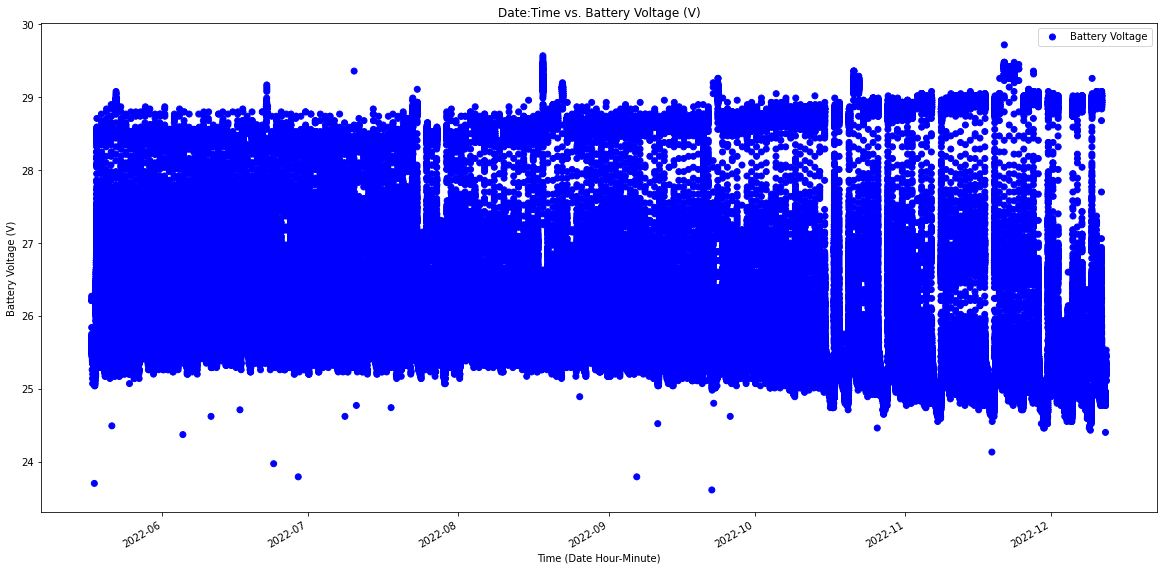

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis

ax.scatter(df.dateTime, df.batteryVoltage, color = pntColor, label = 'Battery Voltage')

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="Voltage (V)", title="Date:Time vs. Battery Voltage (V)")

# For datalog5load, the dateTime column is over one day so it outputs Day Hour-Minute
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Battery Voltage (V)", title="Date:Time vs. Battery Voltage (V)")

leg = ax.legend(loc='upper right')

#ax.set_ylim(22,31)

fig.autofmt_xdate()

#leftLim 
#rightLim

#ax.set_xlim(datetime(2021, 12, 31), datetime(2022, 2, 1))

plt.show()



##  Time (#) vs. Ambient Temperature (C)

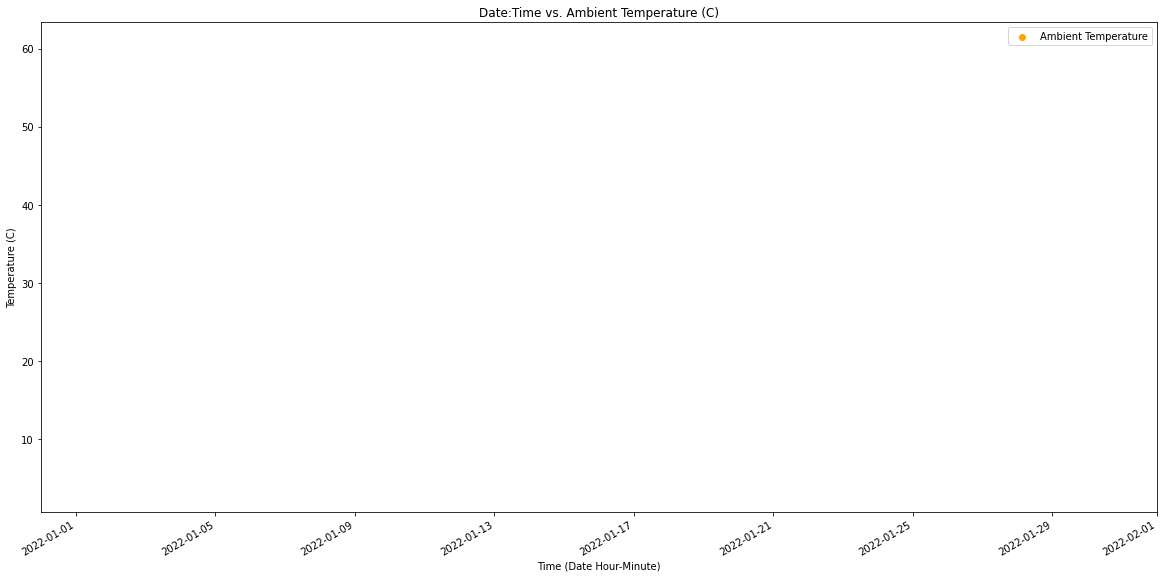

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.T2, color = 'orange', label = 'Ambient Temperature')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Temperature (C)", title="Date:Time vs. Ambient Temperature (C)")

leg = ax.legend(loc='upper right')

#ax.set_ylim(17.5, 40)

fig.autofmt_xdate()
ax.set_xlim(datetime(2021, 12, 31), datetime(2022, 2, 1))
plt.show()

##  Time (#) vs. Ambient Temperature (C) & Battery Voltage (V)

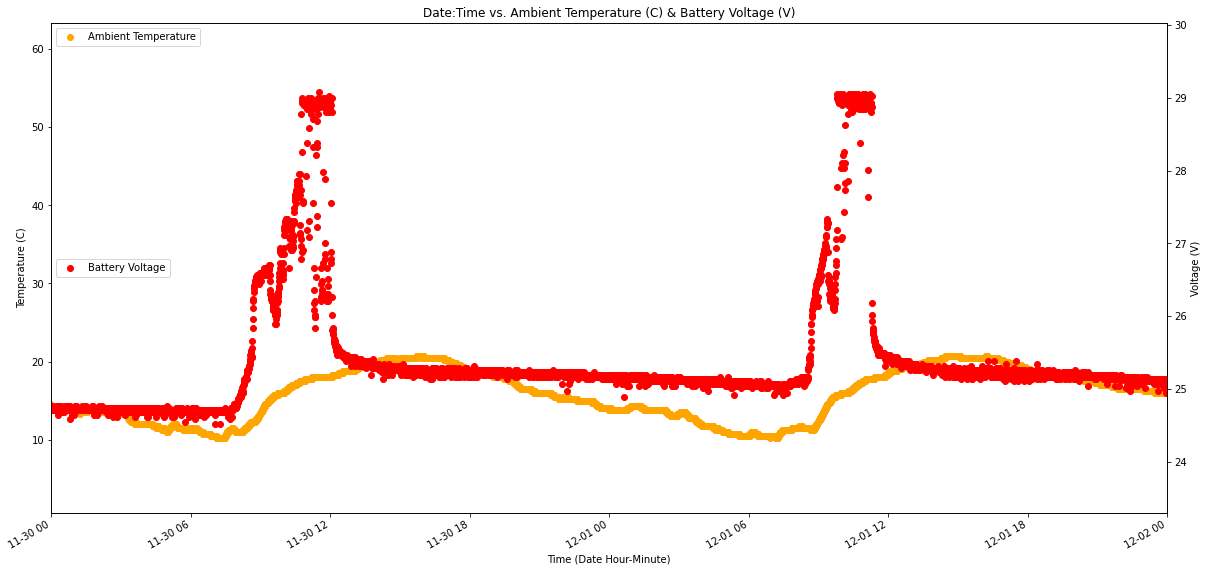

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.T2, color = 'orange', label = 'Ambient Temperature')
ax2 = ax.twinx()
ax2.scatter(df.dateTime, df.batteryVoltage, color = 'red', label = 'Battery Voltage')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Temperature (C)", title="Date:Time vs. Ambient Temperature (C) & Battery Voltage (V)")
ax2.set(xlabel="Time (Date Hour-Minute)", ylabel="Voltage (V)")

leg = ax.legend(loc='upper left')
leg = ax2.legend(loc='center left')

fig.autofmt_xdate()

ax.set_xlim(datetime(2022, 11, 30), datetime(2022, 12, 2))

plt.show()

##  Time (#) vs. Current (A)

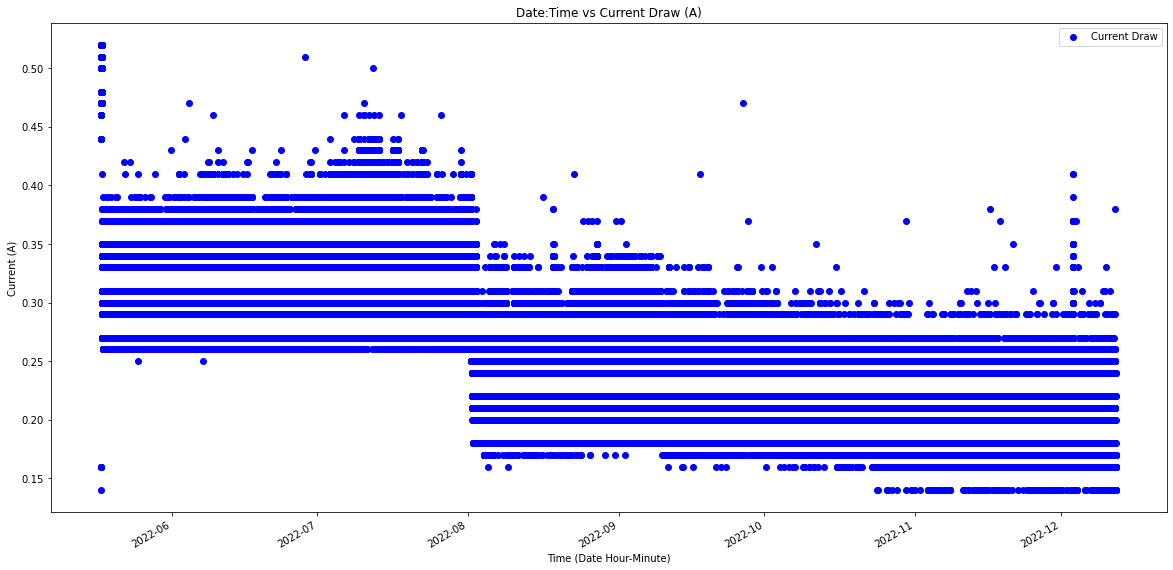

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.currentDraw, color = 'b', label = 'Current Draw')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Current (A)", title="Date:Time vs Current Draw (A)")

leg = ax.legend(loc='best')

#ax.set_ylim(0, 1)

fig.autofmt_xdate()

plt.show()

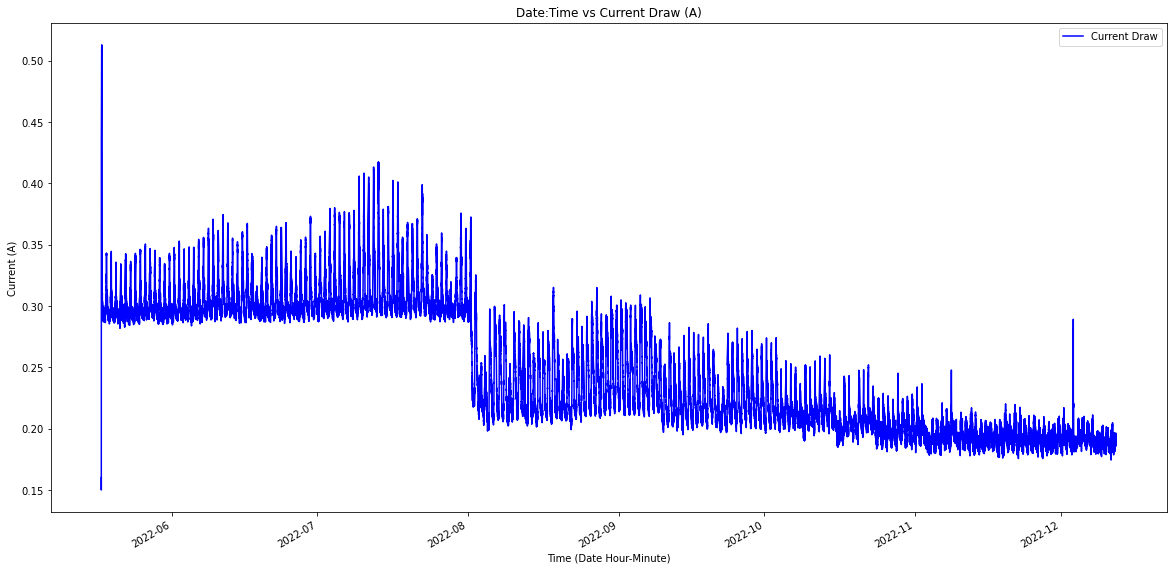

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add x-axis and y-axis
ax.plot(df.dateTime, smaDf.currentSMA50, color = 'b', label = 'Current Draw')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Current (A)", title="Date:Time vs Current Draw (A)")

leg = ax.legend(loc='best')

#ax.set_ylim(0, 1)

fig.autofmt_xdate()

plt.show()

##  Time (#) vs. Current (A) & Voltage (V)

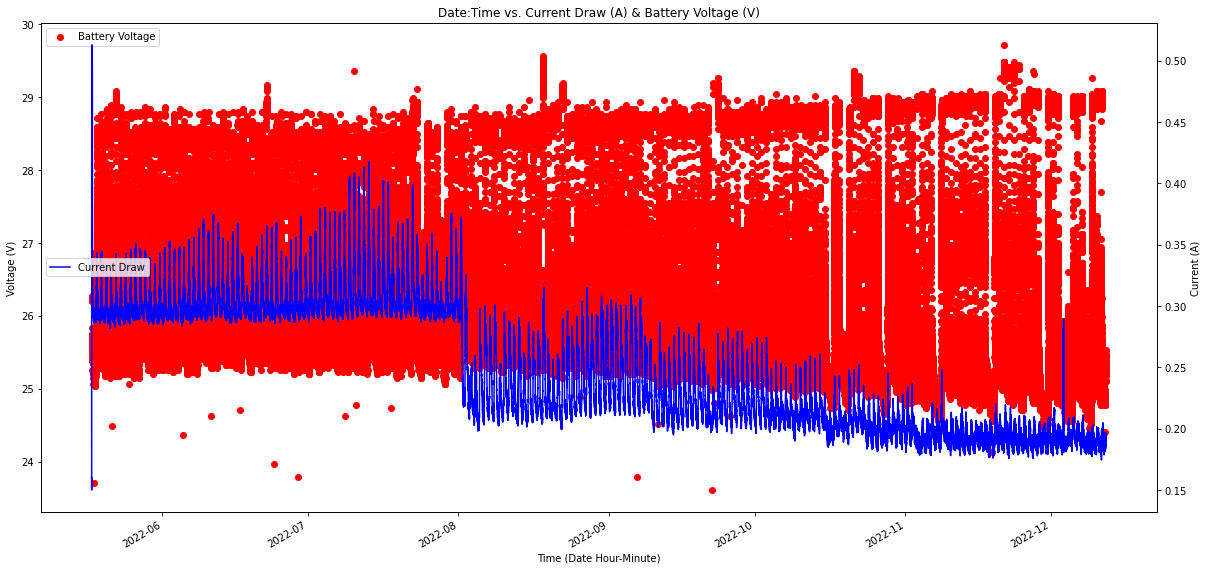

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.batteryVoltage, color = 'r', label = 'Battery Voltage')

ax2 = ax.twinx()
ax2.plot(df.dateTime, smaDf.currentSMA50, color = 'b', label = 'Current Draw')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Voltage (V)", title="Date:Time vs. Current Draw (A) & Battery Voltage (V)")
ax2.set(ylabel="Current (A)")

leg = ax.legend(loc='upper left')
leg2 = ax2.legend(loc='center left')

fig.autofmt_xdate()

plt.show()

## Time(#) vs. Temperature (C), Voltage (V), & Current (A)

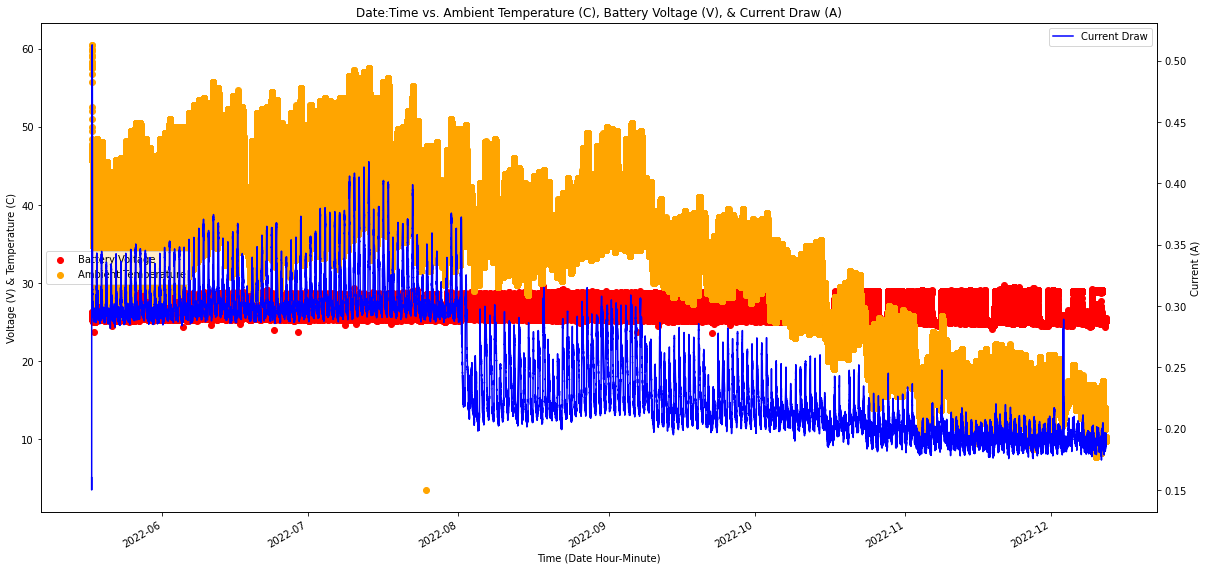

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.batteryVoltage, color = 'red', label = 'Battery Voltage')
ax.scatter(df.dateTime, df.T2, color = 'orange', label = 'Ambient Temperature')

ax2 = ax.twinx()
ax2.plot(df.dateTime, smaDf.currentSMA50, color = 'b', label = 'Current Draw')

# Set title and labels for axes
ax.set_title("Date:Time vs. Ambient Temperature (C), Battery Voltage (V), & Current Draw (A)")

ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Voltage (V) & Temperature (C)")
ax2.set(ylabel="Current (A)")

ax.legend(loc='center left')
ax2.legend(loc='upper right')

fig.autofmt_xdate()
#ax.set_xlim(datetime(2022, 1, 17), datetime(2022, 1, 20))
#ax.set_xlim(datetime(2022, 2, 11), datetime(2022, 2, 15))
plt.show()



## Time(#) vs. Power (W)

### Calculate SMA

In [16]:
# multiplying by 120 to get surge protector voltage produced by inverter
df['powerConsumption'] = 120 * df['currentDraw']
smaDf["powerSMA50"] = df.powerConsumption.rolling(50, min_periods = 1).mean()

In [17]:
pntColor = [] 
for value in smaDf.powerSMA50:
    if value <= 32: #Changes color of points above or below a threshold
        pntColor.append('r') #Change color condition
    else:
        pntColor.append('gold') #Regular color
len(pntColor)

573736

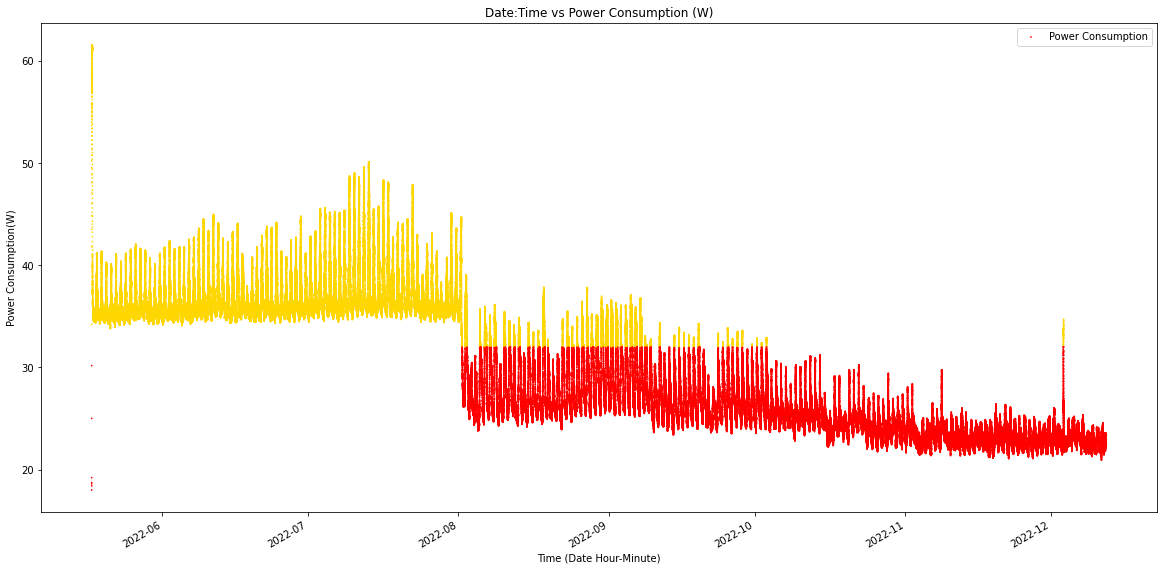

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
# Add x-axis and y-axis
ax.scatter(df.dateTime, smaDf.powerSMA50, s=0.5, color = pntColor, label = 'Power Consumption')

# Set title and labels for axes
ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Power Consumption(W)", title="Date:Time vs Power Consumption (W)")

leg = ax.legend(loc='best')

#ax.set_ylim(0, 1)

fig.autofmt_xdate()

plt.show()

## Time (#) vs. Temperature (C), Voltage (V), & Power (W)

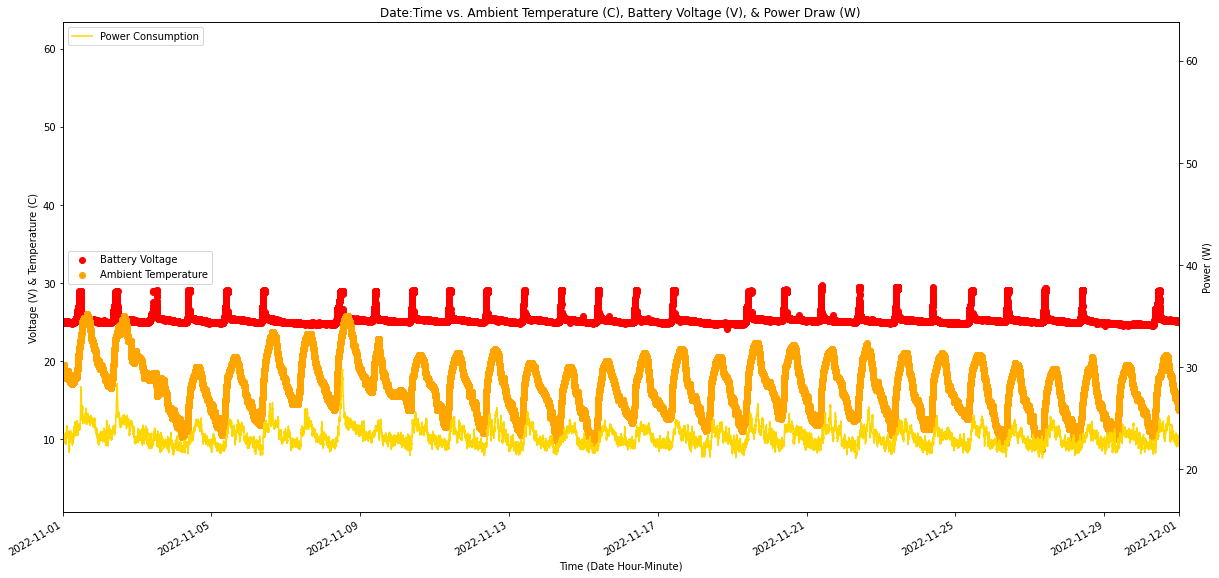

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.batteryVoltage, color = 'red', label = 'Battery Voltage')
ax.scatter(df.dateTime, df.T2, color = 'orange', label = 'Ambient Temperature')

ax2 = ax.twinx()
ax2.plot(df.dateTime, smaDf.powerSMA50, color = 'gold', label = 'Power Consumption')


# Set title and labels for axes
ax.set_title("Date:Time vs. Ambient Temperature (C), Battery Voltage (V), & Power Draw (W)")

ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Voltage (V) & Temperature (C)")
ax2.set(ylabel="Power (W)")

ax.legend(loc='center left')
ax2.legend(loc='upper left')

#ax.set_ylim(10,40)
#ax2.set_ylim(0,2000)

fig.autofmt_xdate()

ax.set_xlim(datetime(2022, 11, 1), datetime(2022, 12, 1))

plt.show()

In [20]:
## The current spikes could be testing our system via Casey plugging in a PS4
# Test senarios varying loads via plugging in various devices: e.g. Jared's fridge

## Energy stored in batteries

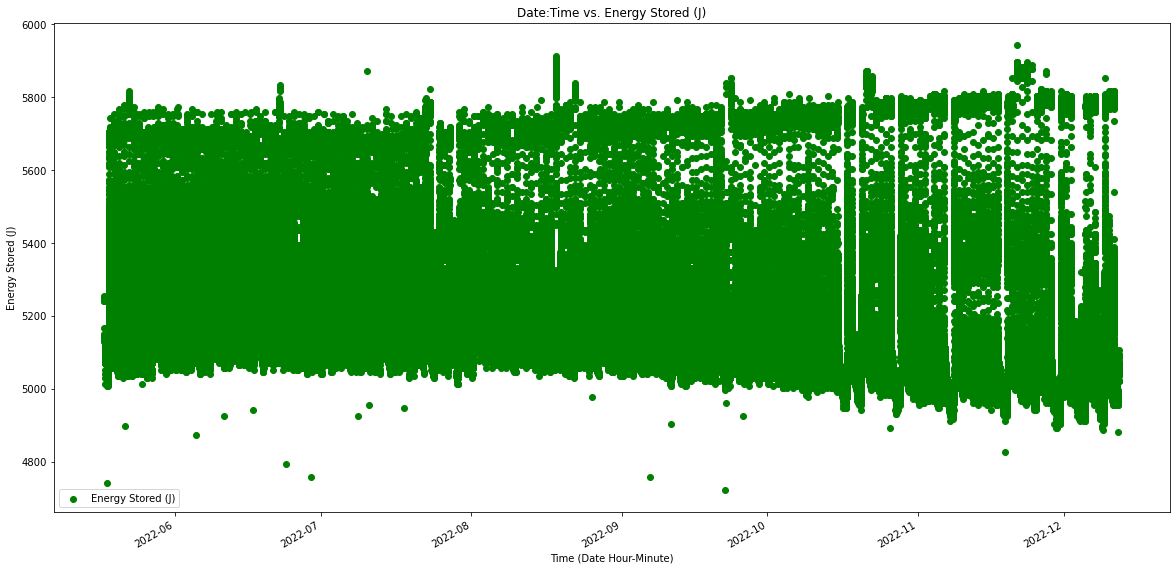

In [21]:
# multiply by 200 (battery current) to get energy stored in batteries
df['energyStored'] = df['batteryVoltage'] * 200

fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.energyStored, color = 'green', label = 'Energy Stored (J)')

# Set title and labels for axes
ax.set_title("Date:Time vs. Energy Stored (J)")

ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Energy Stored (J)")

ax.legend(loc='lower left')

fig.autofmt_xdate()

plt.show()

## Energy Stored over Battery Voltage

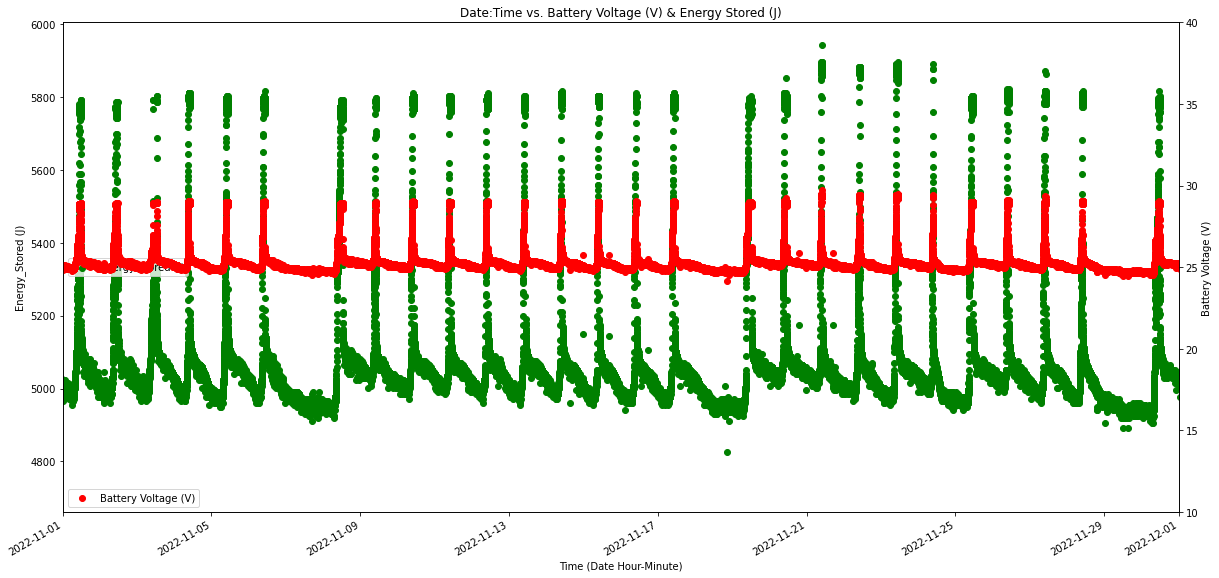

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df.dateTime, df.energyStored, color = 'green', label = 'Energy Stored (J)')

ax2 = ax.twinx()
ax2.scatter(df.dateTime, df.batteryVoltage, color = 'red', label = 'Battery Voltage (V)')


# Set title and labels for axes
ax.set_title("Date:Time vs. Battery Voltage (V) & Energy Stored (J)")

ax.set(xlabel="Time (Date Hour-Minute)", ylabel="Energy_Stored (J)")
ax2.set(ylabel="Battery Voltage (V)")

ax.legend(loc='center left')
ax2.legend(loc='lower left')

ax2.set_ylim(10,40)
#ax2.set_ylim(0,2000)

fig.autofmt_xdate()

plt.show()

## Depth of Discharge of Batteries(Degradation Measure)

In [23]:
def compressDate(date, cycle):
    activeDate = df.loc[df['date'] == date]
    activeDate.reset_index(inplace=True)
    minVolt = min(activeDate['batteryVoltage'])
    maxVolt = max(activeDate['batteryVoltage'])
    #print(minVolt)
    #print(maxVolt)
    DoD = (29.2-maxVolt)/29.2 * 100 #Max capacity of Battery Overall
    #print(DoD)

    to_append = [activeDate.at[0, 'date'], minVolt, maxVolt, DoD, cycle]
    append_series = pd.Series(to_append, index = datesComp.columns)
    return append_series
    #datesComp = datesComp.append(append_series, ignore_index = True)

In [24]:
datesComp = pd.DataFrame(columns = ['date','minVoltage', 'maxVoltage', 'depthOfDischarge', 'numberOfCycles']) # Creating new DataFrame

iterate_date = df.at[0,'date']
cycles = 0

for index in df.index:
    if df.at[index, 'date'] != iterate_date:
        cycles += 1
        datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
        iterate_date = df.at[index, 'date']
        
datesComp

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datesComp = datesComp.append(compressDate(iterate_date, cycles), ignore_index = True)
C:\Users\xplod\AppData\Local\Temp\ipykernel_75752\85083025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from

,date,minVoltage,maxVoltage,depthOfDischarge,numberOfCycles
0,2022-17-05,25.07,26.27,10.034247,1
1,2022-18-05,23.70,28.71,1.678082,2
2,2022-19-05,25.29,28.77,1.472603,3
3,2022-20-05,25.17,28.84,1.232877,4
4,2022-21-05,24.49,28.90,1.027397,5
...,...,...,...,...,...
204,2022-07-12,24.77,29.02,0.616438,205
205,2022-08-12,24.46,26.36,9.726027,206
206,2022-09-12,24.43,29.26,-0.205479,207
207,2022-10-12,24.89,29.08,0.410959,208


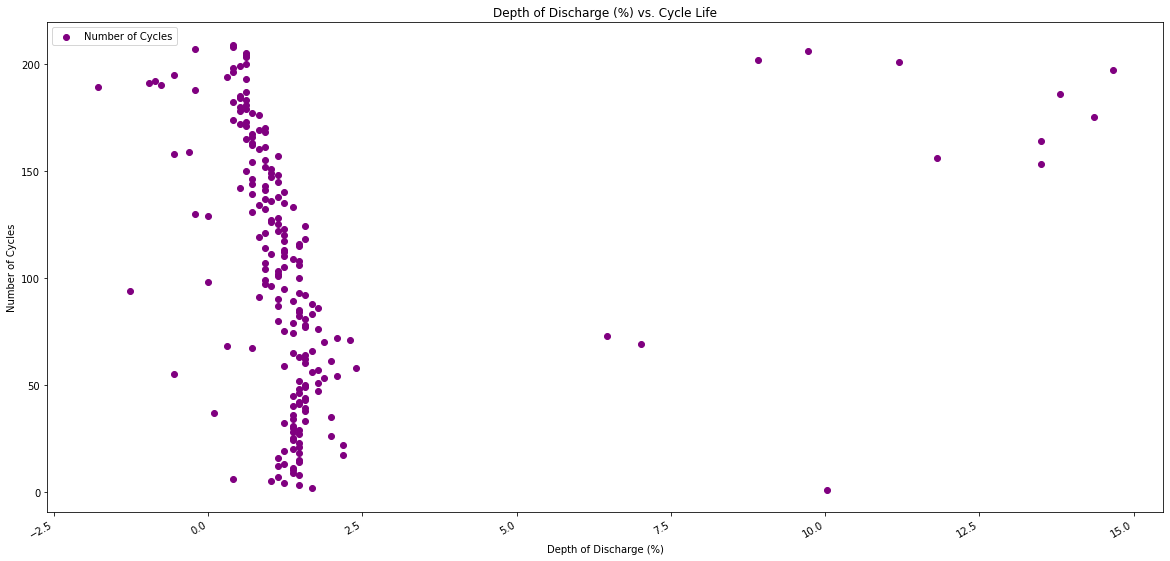

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(datesComp.depthOfDischarge, datesComp.numberOfCycles, color = 'purple', label = 'Number of Cycles')

# Set title and labels for axes
ax.set(xlabel="Depth of Discharge (%)", ylabel="Number of Cycles", title="Depth of Discharge (%) vs. Cycle Life")

leg = ax.legend(loc='upper left')

# ax.set_ylim(0, )

fig.autofmt_xdate()

plt.show()